# Tutorial: Uber Rides Dataset


## Introduction

This tutorial will walk you through the entire data science pipeline using [Uber Rides Data](https://www.kaggle.com/datasets/ruchikakumbhar/uber-dataset). From acquiring and curating raw data to transforming it into a structured, queryable format.

We will begin with data cleaning and preprocessing, addressing missing values, correcting data types, and handling outliers to ensure data quality. Next, we'll dive into exploratory data analysis (EDA) to uncover patterns and trends.

Hypothesis testing and machine learning techniques will then be applied to extract meaningful insights. Finally, the tutorial will cover how to effectively communicate results using visualizations and clear explanations.

## Part 1: Data Preprocessing

### Step 1: Importing tools

In this tutorial, we will use common data analysis tools such as numpy and pandas.

In [1]:
import numpy as np
import pandas as pd

### Step 2: Importing the data
To start, we need to import the dataset into a pandas dataframe

In [2]:
# Read data from the CSV file
uber_data = pd.read_csv("./UberDataset.csv") 

# Display the first five rows
display(uber_data.head())


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Step 3: Parsing Data Types
Once data is loaded, we need to ensure that all the columns have the correct data type.

In [3]:
# Check data types and notice that START_DATE and END_DATE are both objects and not datetime
print(uber_data.dtypes)

# Convert START_DATE and END_DATE to datetime variable
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

# Check data types again
print(uber_data.dtypes)


START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object
START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object


### Step 4: Droping Duplicates and Handling Missing Values
We now try to remove any duplicates and missing values. 

In [4]:
# Display DataFrame
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


From displaying the dataframe, notice that there are data labeled **Unknown Location** from the columns **START** and **Stop**. 

Note: About half of the values in the column **PURPOSE** are **NaN** values so we will **NOT** filter those out.

In [5]:
# Drop duplicate rows
uber_data.drop_duplicates(inplace=True)

# Drop rows where START_DATE or END_DATE is NaT
uber_data = uber_data[~pd.isna(uber_data["START_DATE"])]
uber_data = uber_data[~pd.isna(uber_data["END_DATE"])]

# Drop rows where START or STOP location is "Unknown Location"
uber_data = uber_data[uber_data["START"] != "Unknown Location"]
uber_data = uber_data[uber_data["STOP"] != "Unknown Location"]

# Drop rows that contains NaN in any column"
uber_data.dropna(subset=[col for col in uber_data.columns if col != 'PURPOSE'], inplace=True)


# Display updated dataframe
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


## Part 2: Data Exploration

### Method 1: Hypothesis Testing with Chi-square Test
We use a Chi-square test in order to see if there is an association between the CATEGORY and PURPOSE of the uber rides.

H0: There is no association between CATEGORY and PURPOSE for the uber rides.

HA: There is an assocaition between CATEGORY and PURPOSE for the uber rides.

PURPOSE   Airport/Travel  Between Offices  Charity ($)  Commute  \
CATEGORY                                                          
Business               1               18            0        0   
Personal               0                0            1        1   

PURPOSE   Customer Visit  Errand/Supplies  Meal/Entertain  Meeting  Moving  \
CATEGORY                                                                     
Business              92              111             148      163       0   
Personal               0                0               0        0       4   

PURPOSE   Temporary Site  
CATEGORY                  
Business              32  
Personal               0  
Chi2ContingencyResult(statistic=571.0000000000001, pvalue=3.4933378081111305e-117, dof=9, expected_freq=array([[9.89492119e-01, 1.78108581e+01, 9.89492119e-01, 9.89492119e-01,
        9.10332750e+01, 1.09833625e+02, 1.46444834e+02, 1.61287215e+02,
        3.95796848e+00, 3.16637478e+01],
       [1.05078809e-0

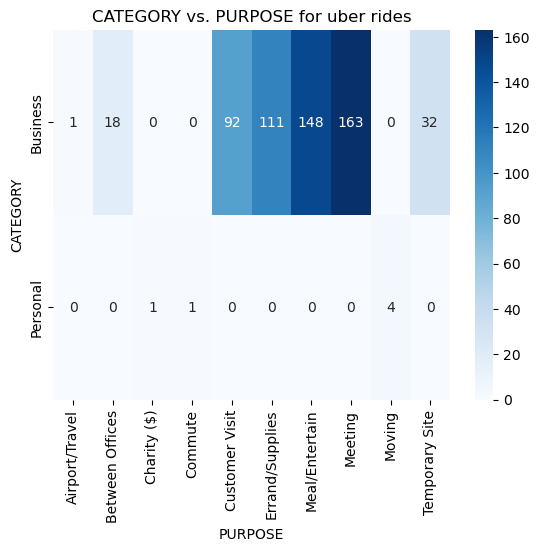

In [6]:
from scipy.stats import chi2_contingency

# Before conducting the chi-squared test, filter the uber_data for only the CATEGORY and PURPOSE tabs
chi_data = pd.crosstab(uber_data['CATEGORY'], uber_data['PURPOSE'])
print(chi_data)

# Conduct the chi-squared test on the filtered data that contains just CATEGORY and PURPOSE
chi2 = chi2_contingency(chi_data)
print(chi2)

import seaborn as sns  
import matplotlib.pyplot as plt

# Create a heatmap to best see the relationship between CATEGORY and PURPOSE.
sns.heatmap(chi_data, annot=True, fmt='d', cmap='Blues')
# Name the graph
plt.title("CATEGORY vs. PURPOSE for uber rides")
plt.show()

Based on the p-value above(less than .05), we reject the null hypothesis. Therefore, the conclusion is that there is an association between CATEGORY and PURPOSE.

In the context of our dataset, this means that people have an uber personal or business account based on the purposes of their rides. This helps us understand why people choose an uber personal or business account. If you're a business, it could be helpful to analyze this type of data to see how you should advertise your different memborship plans.

### Method 2:

### Method 3: